In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import scikitplot as skplt
from collections import Counter
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,BaseNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.svm import NuSVC,NuSVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve,
                             auc,
                             confusion_matrix,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             classification_report,
                             f1_score,
                             precision_recall_fscore_support)
from sklearn.preprocessing import label_binarize,OneHotEncoder,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
%matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",verticalalignment ="center",fontsize=30,multialignment="center"
                 ,color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [3]:
# some global variables
n_neighbors = 3
models = {'Naive Bayes':[],
          'KNN':[],
          'LDA':[],
          'QDA':[],
          'Linear SVM':[],
          'Non Linear SVM':[],
          'Logistic Regression':[],
          'CART':[],
          'Random Forest':[],
          'AdaBoost':[],
          'GradBoost':[]}

In [4]:
#Loading the data
data = pd.read_csv('D:/m2/app_sup/projet_app_sup_20/Datasets_projet_MLDS/VisaPremier.txt',delimiter='\t')
data

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,...,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,sexer,cartevpr,nbjdebit
0,148009,31,1,Shom,51,Fmar,238,Pcad,A,0,...,0,14,2,0,1303700,556967,Coui,0,1,1
1,442153,82,6,Shom,52,Fmar,270,Pcad,A,0,...,19500000,5,2,0,19856243,133896,Coui,0,1,0
2,552427,97,1,Shom,58,Fmar,139,Pcad,C,0,...,0,0,1,0,122745,0,Coui,0,1,0
3,556005,40,1,Shom,27,Fcel,99,Psan,B,0,...,0,14,2,0,83224,0,Coui,0,1,0
4,556686,65,1,Shom,49,Fsep,89,Pemp,A,0,...,0,11,3,1,494773,21423,Coui,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,7567726,31,1,Sfem,38,Fmar,23,Psan,.,0,...,0,.,0,0,0,0,Cnon,1,0,0
1069,7572458,31,1,Sfem,43,Fmar,27,Pcad,.,0,...,0,.,0,0,10685,0,Cnon,1,0,0
1070,7574479,32,1,Sfem,49,Fmar,31,Pemp,B,0,...,0,9,1,0,63336,0,Cnon,1,0,9
1071,7580358,65,3,Sfem,27,F.,192,Psan,D,0,...,0,2,1,0,27897,0,Cnon,1,0,38


il existe un certain nombre de variables quantitatives nous decidons de les supprimmer pour la suite de l'experiance

In [5]:


var_qual=data.dtypes[data.dtypes == "object"]



In [6]:
print(var_qual)

departem    object
sexe        object
sitfamil    object
csp         object
codeqlt     object
agemvt      object
nbpaiecb    object
cartevp     object
dtype: object


In [7]:
to_drop = ['cartevpr','departem','sexe' ,'sitfamil'  ,  
'csp'  ,     
'codeqlt'  , 
'agemvt','nbpaiecb'  ,  
'cartevp','matricul','age','sexer']

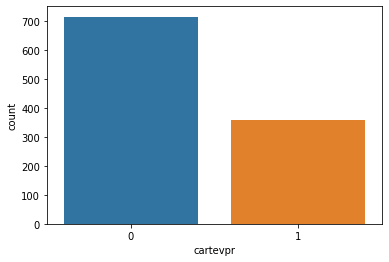

In [8]:
# Check imbalance
ax = sns.countplot(x='cartevpr', data=data)

In [9]:
l=data.sort_values('anciente', ascending=False)
l=l[l['cartevpr']==0]

In [10]:
X=pd.concat([data[0:359],l[0:400]],axis=0)

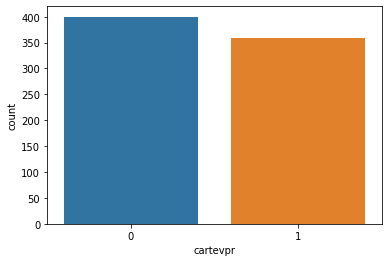

In [11]:
ax = sns.countplot(x='cartevpr', data=X)

In [12]:
label=X['cartevpr']

In [13]:
data_smote  = X.drop(to_drop,axis=1)

In [14]:
x = data_smote.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_c_n = pd.concat([pd.DataFrame(x_scaled),pd.DataFrame(label.values)],axis=1)
#data_c_n=data_c_n[0:759]
data_c_n

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,0
0,0.000000,0.272727,0.0,1.000000,0.000000,0.005874,0.723648,0.040404,0.034327,0.000000,...,0.0,0.0,0.0,0.0,0.4,0.0,0.065657,0.078817,0.007463,1
1,0.833333,0.309551,0.0,1.000000,0.142857,1.000000,0.009196,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,1.0,0.4,0.0,1.000000,0.018948,0.000000,1
2,0.000000,0.158803,0.0,1.000000,0.000000,0.002043,0.003507,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.2,0.0,0.006182,0.000000,0.000000,1
3,0.000000,0.112773,0.0,1.000000,0.000000,0.000868,0.078681,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.4,0.0,0.004191,0.000000,0.000000,1
4,0.000000,0.101266,0.0,1.000000,0.000000,0.019102,0.487990,0.000000,0.060197,0.075600,...,0.0,0.0,0.0,0.0,0.6,0.5,0.024918,0.003032,0.111940,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,0.333333,0.140391,0.0,0.941176,0.071429,0.001737,0.000195,0.090909,0.069223,0.124426,...,0.0,0.0,0.0,0.0,0.4,0.0,0.000010,0.000000,0.850746,0
755,0.166667,0.138090,0.0,1.000000,0.000000,0.001481,0.054377,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.6,0.5,0.003658,0.000000,0.000000,0
756,0.000000,0.138090,0.0,1.000000,0.000000,0.001073,0.152498,0.050505,0.007913,0.000000,...,0.0,0.0,0.0,0.0,0.4,0.0,0.007943,0.000000,0.022388,0
757,0.333333,0.136939,0.0,1.000000,0.178571,0.001226,0.000110,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.2,0.0,0.001885,0.004738,0.000000,0


In [15]:
x = data_smote.values #returns a numpy array
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
data_c_s = pd.concat([pd.DataFrame(x_scaled),pd.DataFrame(label.values)],axis=1)
#data_c_s=data_c_s[0:759]
data_c_s

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,0
0,-0.601783,0.223225,0.0,0.052728,-0.556235,0.072180,4.855422,-0.174237,0.062972,-0.215091,...,-0.0514,-0.036322,-0.036322,-0.036322,0.855200,-0.337078,1.276600,1.210800,-0.502137,1
1,4.068499,0.417036,0.0,0.052728,0.703071,27.274274,-0.475457,-0.478075,-0.356024,-0.215091,...,-0.0514,-0.036322,27.531800,27.531800,0.855200,-0.337078,22.581510,0.158882,-0.543167,1
2,-0.601783,-0.376379,0.0,0.052728,-0.556235,-0.032637,-0.517903,-0.478075,-0.356024,-0.215091,...,-0.0514,-0.036322,-0.036322,-0.036322,-0.267805,-0.337078,-0.079555,-0.174036,-0.543167,1
3,-0.601783,-0.618644,0.0,0.052728,-0.556235,-0.064781,0.043009,-0.478075,-0.356024,-0.215091,...,-0.0514,-0.036322,-0.036322,-0.036322,0.855200,-0.337078,-0.124939,-0.174036,-0.543167,1
4,-0.601783,-0.679210,0.0,0.052728,-0.556235,0.434147,3.097057,-0.478075,0.378745,1.254751,...,-0.0514,-0.036322,-0.036322,-0.036322,1.978205,2.570221,0.347665,-0.120770,0.072274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,1.266329,-0.473285,0.0,-1.548103,0.073418,-0.041023,-0.542618,0.205561,0.488914,2.204040,...,-0.0514,-0.036322,-0.036322,-0.036322,0.855200,-0.337078,-0.220284,-0.174036,4.134186,0
755,0.332273,-0.485398,0.0,0.052728,-0.556235,-0.048010,-0.138336,-0.478075,-0.356024,-0.215091,...,-0.0514,-0.036322,-0.036322,-0.036322,1.978205,2.570221,-0.137102,-0.174036,-0.543167,0
756,-0.601783,-0.485398,0.0,0.052728,-0.556235,-0.059191,0.593790,-0.098277,-0.259433,-0.215091,...,-0.0514,-0.036322,-0.036322,-0.036322,0.855200,-0.337078,-0.039387,-0.174036,-0.420078,0
757,1.266329,-0.491455,0.0,0.052728,1.017897,-0.054998,-0.543249,-0.478075,-0.356024,-0.215091,...,-0.0514,-0.036322,-0.036322,-0.036322,-0.267805,-0.337078,-0.177526,-0.090779,-0.543167,0


In [16]:
# Check for missing values 
np.any(data_c_s.isnull().values)

False

In [287]:
# A statistical summary of the data before/after normalisation
data_c_s.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,0
count,7.590000e+02,7.590000e+02,759.0,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,...,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,759.000000
mean,1.427639e-16,-2.735332e-17,0.0,-2.692730e-16,2.288098e-16,-5.668135e-19,-1.199450e-16,2.274568e-16,-1.502239e-16,2.428156e-16,...,2.128476e-16,-2.051682e-16,-5.702692e-16,-5.614379e-16,-1.887379e-15,1.226365e-15,2.263597e-17,3.395396e-17,-3.223889e-16,0.472991
std,1.000659e+00,1.000659e+00,0.0,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,...,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,0.499599
min,-6.017834e-01,-1.212191e+00,0.0,-2.716140e+01,-5.562347e-01,-8.853971e-02,-5.440718e-01,-4.780754e-01,-3.560244e-01,-2.150906e-01,...,-5.140047e-02,-3.632164e-02,-3.632164e-02,-3.632164e-02,-1.390810e+00,-3.370782e-01,-2.205102e-01,-1.740356e-01,-5.431667e-01,0.000000
25%,-6.017834e-01,-4.369455e-01,0.0,5.272830e-02,-5.562347e-01,-8.015435e-02,-5.433025e-01,-4.780754e-01,-3.560244e-01,-2.150906e-01,...,-5.140047e-02,-3.632164e-02,-3.632164e-02,-3.632164e-02,-2.678048e-01,-3.370782e-01,-2.117752e-01,-1.740356e-01,-5.431667e-01,0.000000
50%,-6.017834e-01,-1.159453e-01,0.0,5.272830e-02,-2.414083e-01,-6.617876e-02,-4.361033e-01,-4.780754e-01,-3.560244e-01,-2.150906e-01,...,-5.140047e-02,-3.632164e-02,-3.632164e-02,-3.632164e-02,-2.678048e-01,-3.370782e-01,-1.660506e-01,-1.740356e-01,-5.431667e-01,0.000000
75%,3.322730e-01,2.807624e-01,0.0,5.272830e-02,7.341800e-02,-3.962513e-02,8.080859e-02,1.296018e-01,-1.103151e-01,-2.150906e-01,...,-5.140047e-02,-3.632164e-02,-3.632164e-02,-3.632164e-02,8.551999e-01,-3.370782e-01,-3.772133e-02,-1.515164e-01,-9.784353e-03,1.000000
max,5.002555e+00,4.051000e+00,0.0,5.272830e-02,8.258903e+00,2.727427e+01,6.917416e+00,7.041929e+00,1.184997e+01,1.922725e+01,...,1.945508e+01,2.753180e+01,2.753180e+01,2.753180e+01,4.224214e+00,5.477520e+00,2.258151e+01,1.739631e+01,4.954775e+00,1.000000


In [40]:
def results_report(model,y_te,y_te_binarised,y_pred,y_pred_binarized):
    metrics={'acc':0,
         'bal_acc':0,
         'recall':0,
         'f_1_score':0,
         'roc_auc_score':0}
    #y_pred = model.predict(x_te)
    metrics['acc']=accuracy_score(y_te,y_pred)
    metrics['bal_acc']=accuracy_score(y_te,y_pred)
    metrics['recall']=recall_score(y_te,y_pred,average='macro')
    metrics['f_1_score']=f1_score(y_te,y_pred,average='macro')
    metrics['roc_auc_score']=roc_auc_score(y_te,y_pred)
    
    plt.bar(metrics.keys(),metrics.values())
    plt.show()
    return metrics

def results_report_cross_val(model,y_te,y_te_binarised,y_pred,y_pred_binarized,x):
    metrics={'acc':0,
         'bal_acc':0,
         'recall':0,
         'f_1_score':0,
         'roc_auc_score':0}
    #y_pred = model.predict(x_te)
    
    metrics['acc']=cross_val_score(model, x,y_te, cv=5, scoring=make_scorer(accuracy_score)).mean()
    metrics['bal_acc']=cross_val_score(model, x,y_te, cv=5, scoring=make_scorer(balanced_accuracy_score)).mean()
    metrics['recall']=cross_val_score(model, x,y_te, cv=5, scoring='recall_macro').mean()
    metrics['f_1_score']=cross_val_score(model, x,y_te, cv=5, scoring='f1_macro').mean()
    metrics['roc_auc_score']=cross_val_score(model, x,y_te, cv=5, scoring=make_scorer(roc_auc_score)).mean()
    
    plt.bar(metrics.keys(),metrics.values())
    plt.show()
    return metrics

def plot_curves(model,y_true,y_pred,y_probas=None):
    #y_pred = model.predict(x_te)
    cnf_matrix = confusion_matrix(y_true,y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['have_card','No_card'],
                      title='Confusion matrix')

    
    #predict_proba = getattr(model, "predict_proba", None)
    if (y_probas is not None):
        y_probas = model.predict_proba(x_te)
        skplt.metrics.plot_roc(y_true, y_probas)
        skplt.metrics.plot_precision_recall(y_true,y_probas)

In [18]:
# splittign the dataset
#Change data_c_s to data_c_n to use normalized data
x_t,x_te,y_t,y_te = train_test_split(data_c_s.values[:,:-1],
                                     data_c_s.values[:,-1],
                                     test_size=0.33, 
                                     random_state=42)
classes = list(set(y_te).union(set(y_t)))
y_te_bin = label_binarize(y_te,classes)

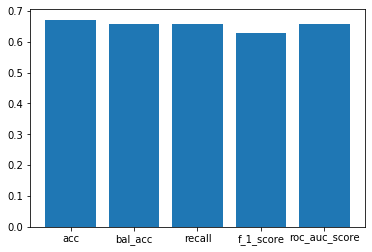

{'acc': 0.6711706464764123, 'bal_acc': 0.6567572892040976, 'recall': 0.6567572892040976, 'f_1_score': 0.6283375854888962, 'roc_auc_score': 0.6567572892040978}
              precision    recall  f1-score   support

         0.0       0.69      0.57      0.62       130
         1.0       0.61      0.73      0.66       121

    accuracy                           0.65       251
   macro avg       0.65      0.65      0.64       251
weighted avg       0.65      0.65      0.64       251



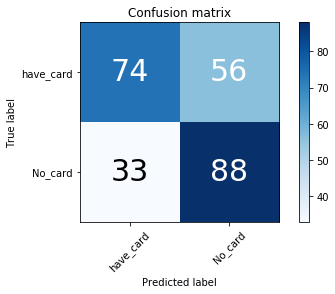

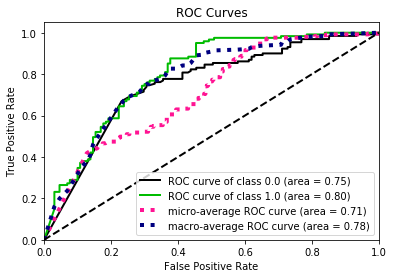

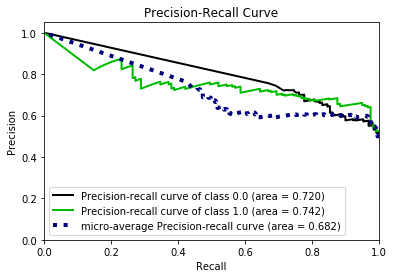

In [78]:
NB_model = GaussianNB()

#evaluating the model
NB_model.fit(x_t,y_t)
y_pred =cross_val_predict(NB_model, x_te, y_te, cv=3)
predict_proba = getattr(NB_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = NB_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(NB_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Naive Bayes']=r
#ax.set_ylim(interp.data.c - .5, - .5)
plot_curves(NB_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

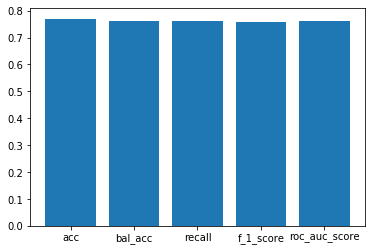

{'acc': 0.7695010677538342, 'bal_acc': 0.7602738376674547, 'recall': 0.7602738376674547, 'f_1_score': 0.7589351851112192, 'roc_auc_score': 0.7602738376674547}
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77       130
         1.0       0.80      0.61      0.69       121

    accuracy                           0.74       251
   macro avg       0.75      0.73      0.73       251
weighted avg       0.75      0.74      0.73       251



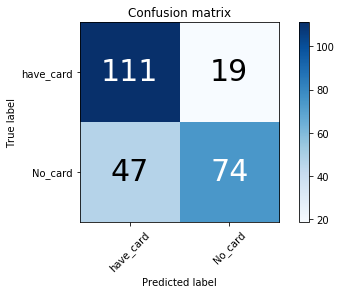

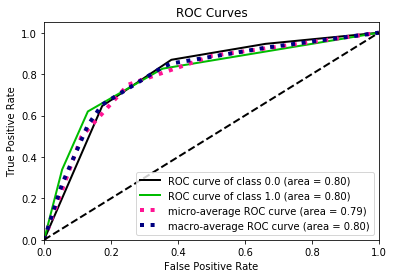

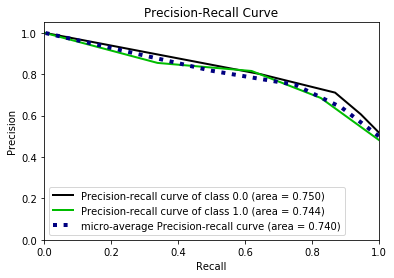

In [76]:


KNN_model = KNeighborsClassifier(n_neighbors=n_neighbors)
# fitting the model
KNN_model.fit(x_t,y_t)
#evaluating the model
y_pred =cross_val_predict(KNN_model, x_te, y_te, cv=3)
predict_proba = getattr(KNN_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = KNN_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(KNN_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['KNN']=r
#ax.set_ylim(interp.data.c - .5, - .5)
plot_curves(KNN_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))


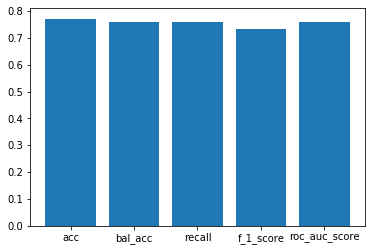

{'acc': 0.7712871287128713, 'bal_acc': 0.7604905437352245, 'recall': 0.7604905437352245, 'f_1_score': 0.7316322608480277, 'roc_auc_score': 0.7604905437352245}
              precision    recall  f1-score   support

         0.0       0.66      0.88      0.76       130
         1.0       0.81      0.52      0.63       121

    accuracy                           0.71       251
   macro avg       0.74      0.70      0.70       251
weighted avg       0.73      0.71      0.70       251



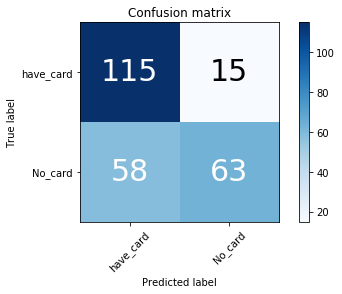

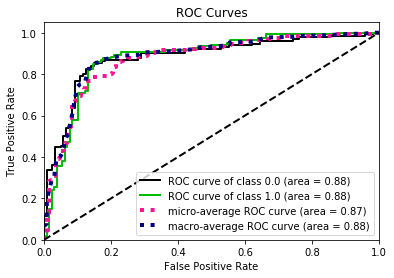

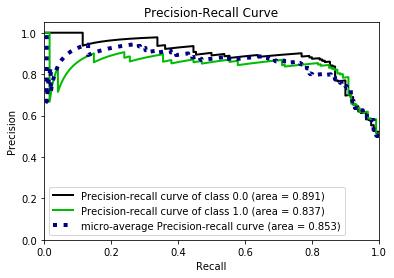

In [62]:
LDA_model = LinearDiscriminantAnalysis()
# fitting the model
LDA_model.fit(x_t,y_t)
#evaluating the model
y_pred =cross_val_predict(LDA_model , x_te, y_te, cv=3)
predict_proba = getattr(LDA_model , "predict_proba", None)
if callable(predict_proba):
    y_probas = LDA_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(LDA_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['LDA']=r
plot_curves(LDA_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



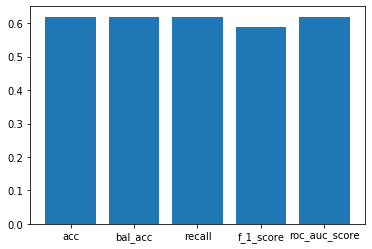

{'acc': 0.6177247136478353, 'bal_acc': 0.619459219858156, 'recall': 0.619459219858156, 'f_1_score': 0.5886570629130676, 'roc_auc_score': 0.619459219858156}
              precision    recall  f1-score   support

         0.0       0.67      0.39      0.50       130
         1.0       0.55      0.79      0.65       121

    accuracy                           0.59       251
   macro avg       0.61      0.59      0.57       251
weighted avg       0.61      0.59      0.57       251



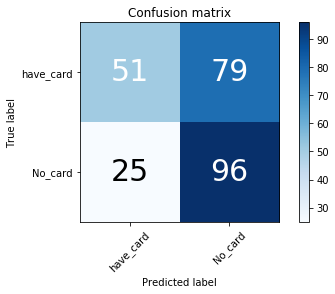

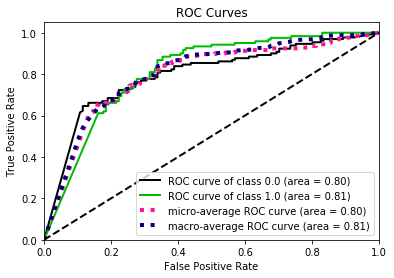

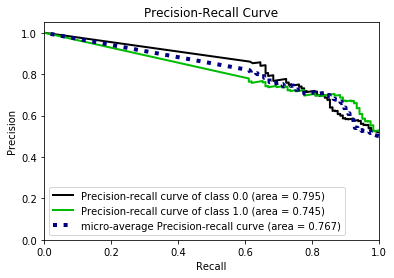

In [80]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(QDA_model , x_te, y_te, cv=3)
predict_proba = getattr(QDA_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = QDA_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(QDA_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['QDA']=r
plot_curves(QDA_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



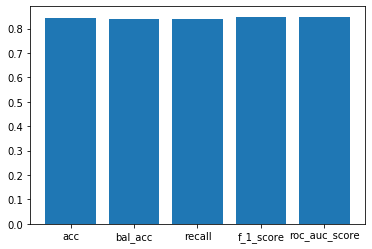

{'acc': 0.8443603183847797, 'bal_acc': 0.8401842001576043, 'recall': 0.840415681639086, 'f_1_score': 0.847089429225172, 'roc_auc_score': 0.8483303782505909}
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80       130
         1.0       0.78      0.78      0.78       121

    accuracy                           0.79       251
   macro avg       0.79      0.79      0.79       251
weighted avg       0.79      0.79      0.79       251



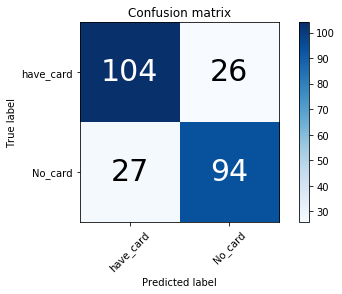

In [60]:
LSVM_model = LinearSVC()
LSVM_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(LSVM_model , x_te, y_te, cv=3)
predict_proba = getattr(LSVM_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = LSVM_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(LSVM_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Linear SVM']=r
plot_curves(LSVM_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

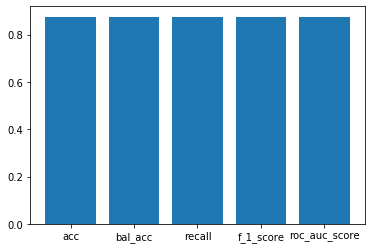

{'acc': 0.8758105222286934, 'bal_acc': 0.8734633569739951, 'recall': 0.8734633569739951, 'f_1_score': 0.8747673787843944, 'roc_auc_score': 0.8734633569739951}
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       130
         1.0       0.83      0.79      0.81       121

    accuracy                           0.82       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.82      0.82      0.82       251



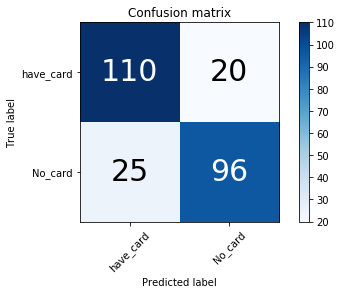

In [59]:
NLSVM_model = NuSVC()
NLSVM_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(NLSVM_model , x_te, y_te, cv=3)
predict_proba = getattr(NLSVM_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = NLSVM_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(NLSVM_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Non Linear SVM']=r
plot_curves(NLSVM_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

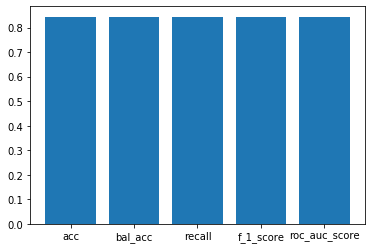

{'acc': 0.8444185595030091, 'bal_acc': 0.841617415287628, 'recall': 0.841617415287628, 'f_1_score': 0.8428365052108786, 'roc_auc_score': 0.841617415287628}
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       130
         1.0       0.79      0.83      0.81       121

    accuracy                           0.81       251
   macro avg       0.81      0.81      0.81       251
weighted avg       0.81      0.81      0.81       251



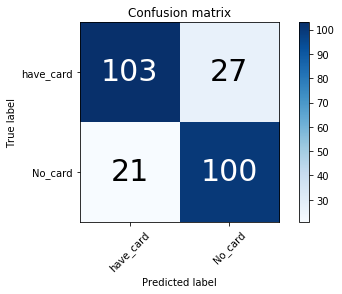

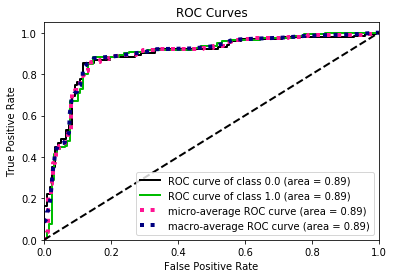

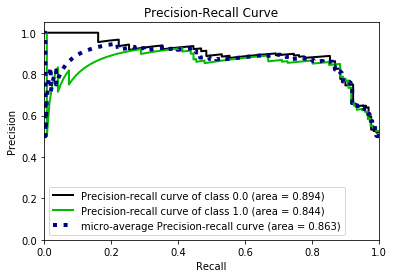

In [63]:
LR_model = LogisticRegression()
LR_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(LR_model , x_te, y_te, cv=3)
predict_proba = getattr(LR_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = LR_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(LR_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Logistic Regression']=r
plot_curves(LR_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



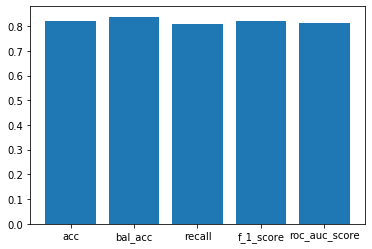

{'acc': 0.8226363812851872, 'bal_acc': 0.8377708825847124, 'recall': 0.8078752955082743, 'f_1_score': 0.8215877886140482, 'roc_auc_score': 0.811578999211978}
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       130
         1.0       0.81      0.80      0.80       121

    accuracy                           0.81       251
   macro avg       0.81      0.81      0.81       251
weighted avg       0.81      0.81      0.81       251



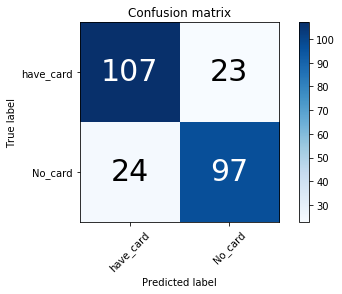

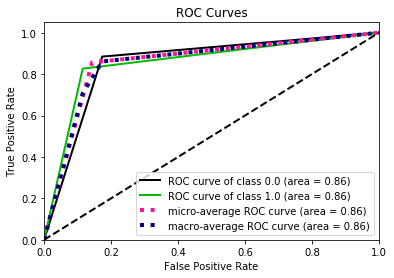

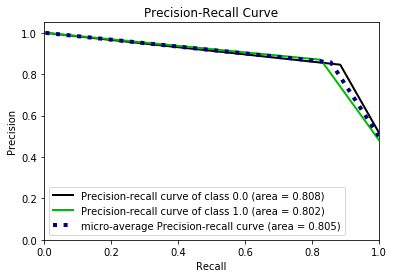

In [64]:
CART_model = DecisionTreeClassifier()
CART_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(CART_model , x_te, y_te, cv=3)
predict_proba = getattr(CART_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = CART_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(CART_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['CART']=r
plot_curves(CART_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



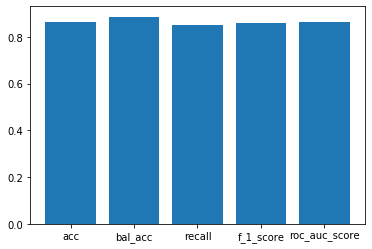

{'acc': 0.8640846437584935, 'bal_acc': 0.885544720252167, 'recall': 0.8506550433412136, 'f_1_score': 0.8608415045277515, 'roc_auc_score': 0.8622192671394799}
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       130
         1.0       0.80      0.78      0.79       121

    accuracy                           0.80       251
   macro avg       0.80      0.80      0.80       251
weighted avg       0.80      0.80      0.80       251



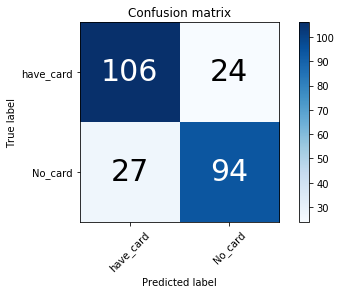

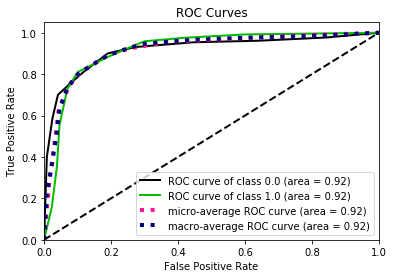

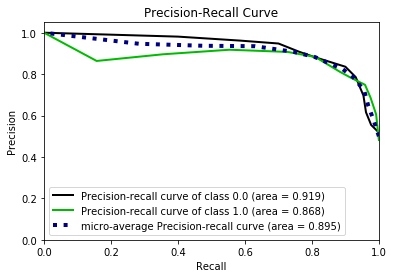

In [65]:
RF_model = RandomForestClassifier()
RF_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(RF_model , x_te, y_te, cv=3)
predict_proba = getattr(RF_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = RF_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(RF_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Random Forest']=r
plot_curves(RF_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

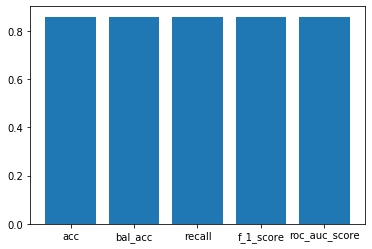

{'acc': 0.8582993593476994, 'bal_acc': 0.8561465721040189, 'recall': 0.8561465721040189, 'f_1_score': 0.8571858729471489, 'roc_auc_score': 0.8561465721040189}
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       130
         1.0       0.81      0.83      0.82       121

    accuracy                           0.82       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.82      0.82      0.82       251



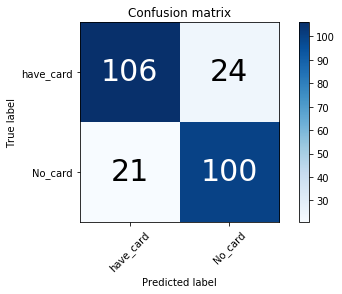

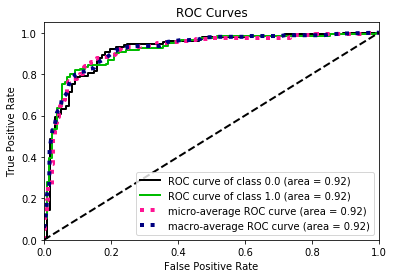

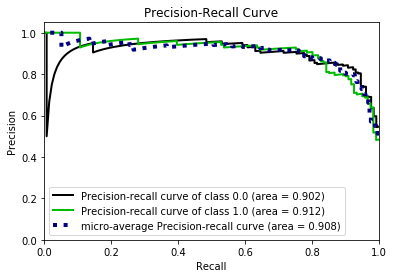

In [66]:
AB_model = AdaBoostClassifier()
AB_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(AB_model , x_te, y_te, cv=3)
predict_proba = getattr(AB_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = AB_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(AB_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['AdaBoost']=r
plot_curves(AB_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

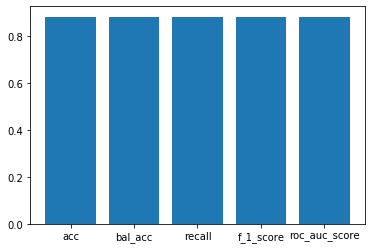

{'acc': 0.8818093574063288, 'bal_acc': 0.881003743104807, 'recall': 0.881003743104807, 'f_1_score': 0.8812228648223668, 'roc_auc_score': 0.881003743104807}
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       130
         1.0       0.83      0.83      0.83       121

    accuracy                           0.84       251
   macro avg       0.84      0.84      0.84       251
weighted avg       0.84      0.84      0.84       251



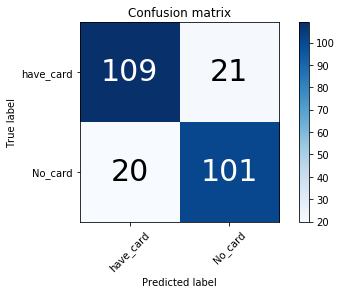

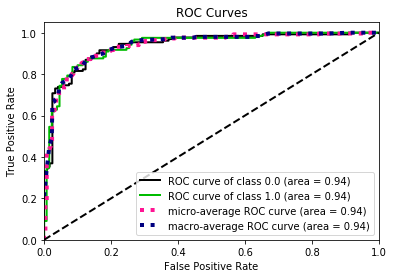

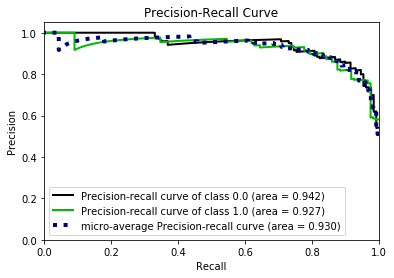

In [67]:
GB_model = GradientBoostingClassifier()
GB_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(GB_model , x_te, y_te, cv=3)
predict_proba = getattr(GB_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = GB_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(GB_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['GradBoost']=r
plot_curves(GB_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

In [81]:
m = pd.DataFrame.from_dict(models).T
m = m.sort_values(by =list(m),ascending=False)
m

,acc,bal_acc,recall,f_1_score,roc_auc_score
GradBoost,0.881809,0.881004,0.881004,0.881223,0.881004
Non Linear SVM,0.875811,0.873463,0.873463,0.874767,0.873463
Random Forest,0.864085,0.885545,0.850655,0.860842,0.862219
AdaBoost,0.858299,0.856147,0.856147,0.857186,0.856147
Logistic Regression,0.844419,0.841617,0.841617,0.842837,0.841617
Linear SVM,0.844360,0.840184,0.840416,0.847089,0.848330
CART,0.822636,0.837771,0.807875,0.821588,0.811579
LDA,0.771287,0.760491,0.760491,0.731632,0.760491
KNN,0.769501,0.760274,0.760274,0.758935,0.760274
Naive Bayes,0.671171,0.656757,0.656757,0.628338,0.656757
